# Handwashing_Discovery

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration


* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
display(df_yearly.shape)
display(df_monthly.shape)

(12, 4)

(98, 3)

In [6]:
display(df_yearly.columns)
display(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

Index(['date', 'births', 'deaths'], dtype='object')

In [7]:
df_yearly.year

0     1841
1     1842
2     1843
3     1844
4     1845
5     1846
6     1841
7     1842
8     1843
9     1844
10    1845
11    1846
Name: year, dtype: int64

### Check for Nan Values and Duplicates

In [8]:
display(df_yearly.isna().sum().any())
display(df_monthly.isna().sum().any())

False

False

In [9]:
display(df_yearly.duplicated().sum().any())
display(df_monthly.duplicated().sum().any())

False

False

### Descriptive Statistics

In [10]:
display(df_yearly.describe())
display(df_monthly.describe())

year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00

### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* the percentage of women giving birth who died throughout the 1840s at the hospital.



In [11]:
pct_of_death =  (sum(df_yearly.deaths) / sum(df_yearly.births) )*100
print(f'{pct_of_death : .03}%')

 7.08%


#  Total Number of Births and Deaths over Time

### the Monthly Data on Twin Axes


In [12]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

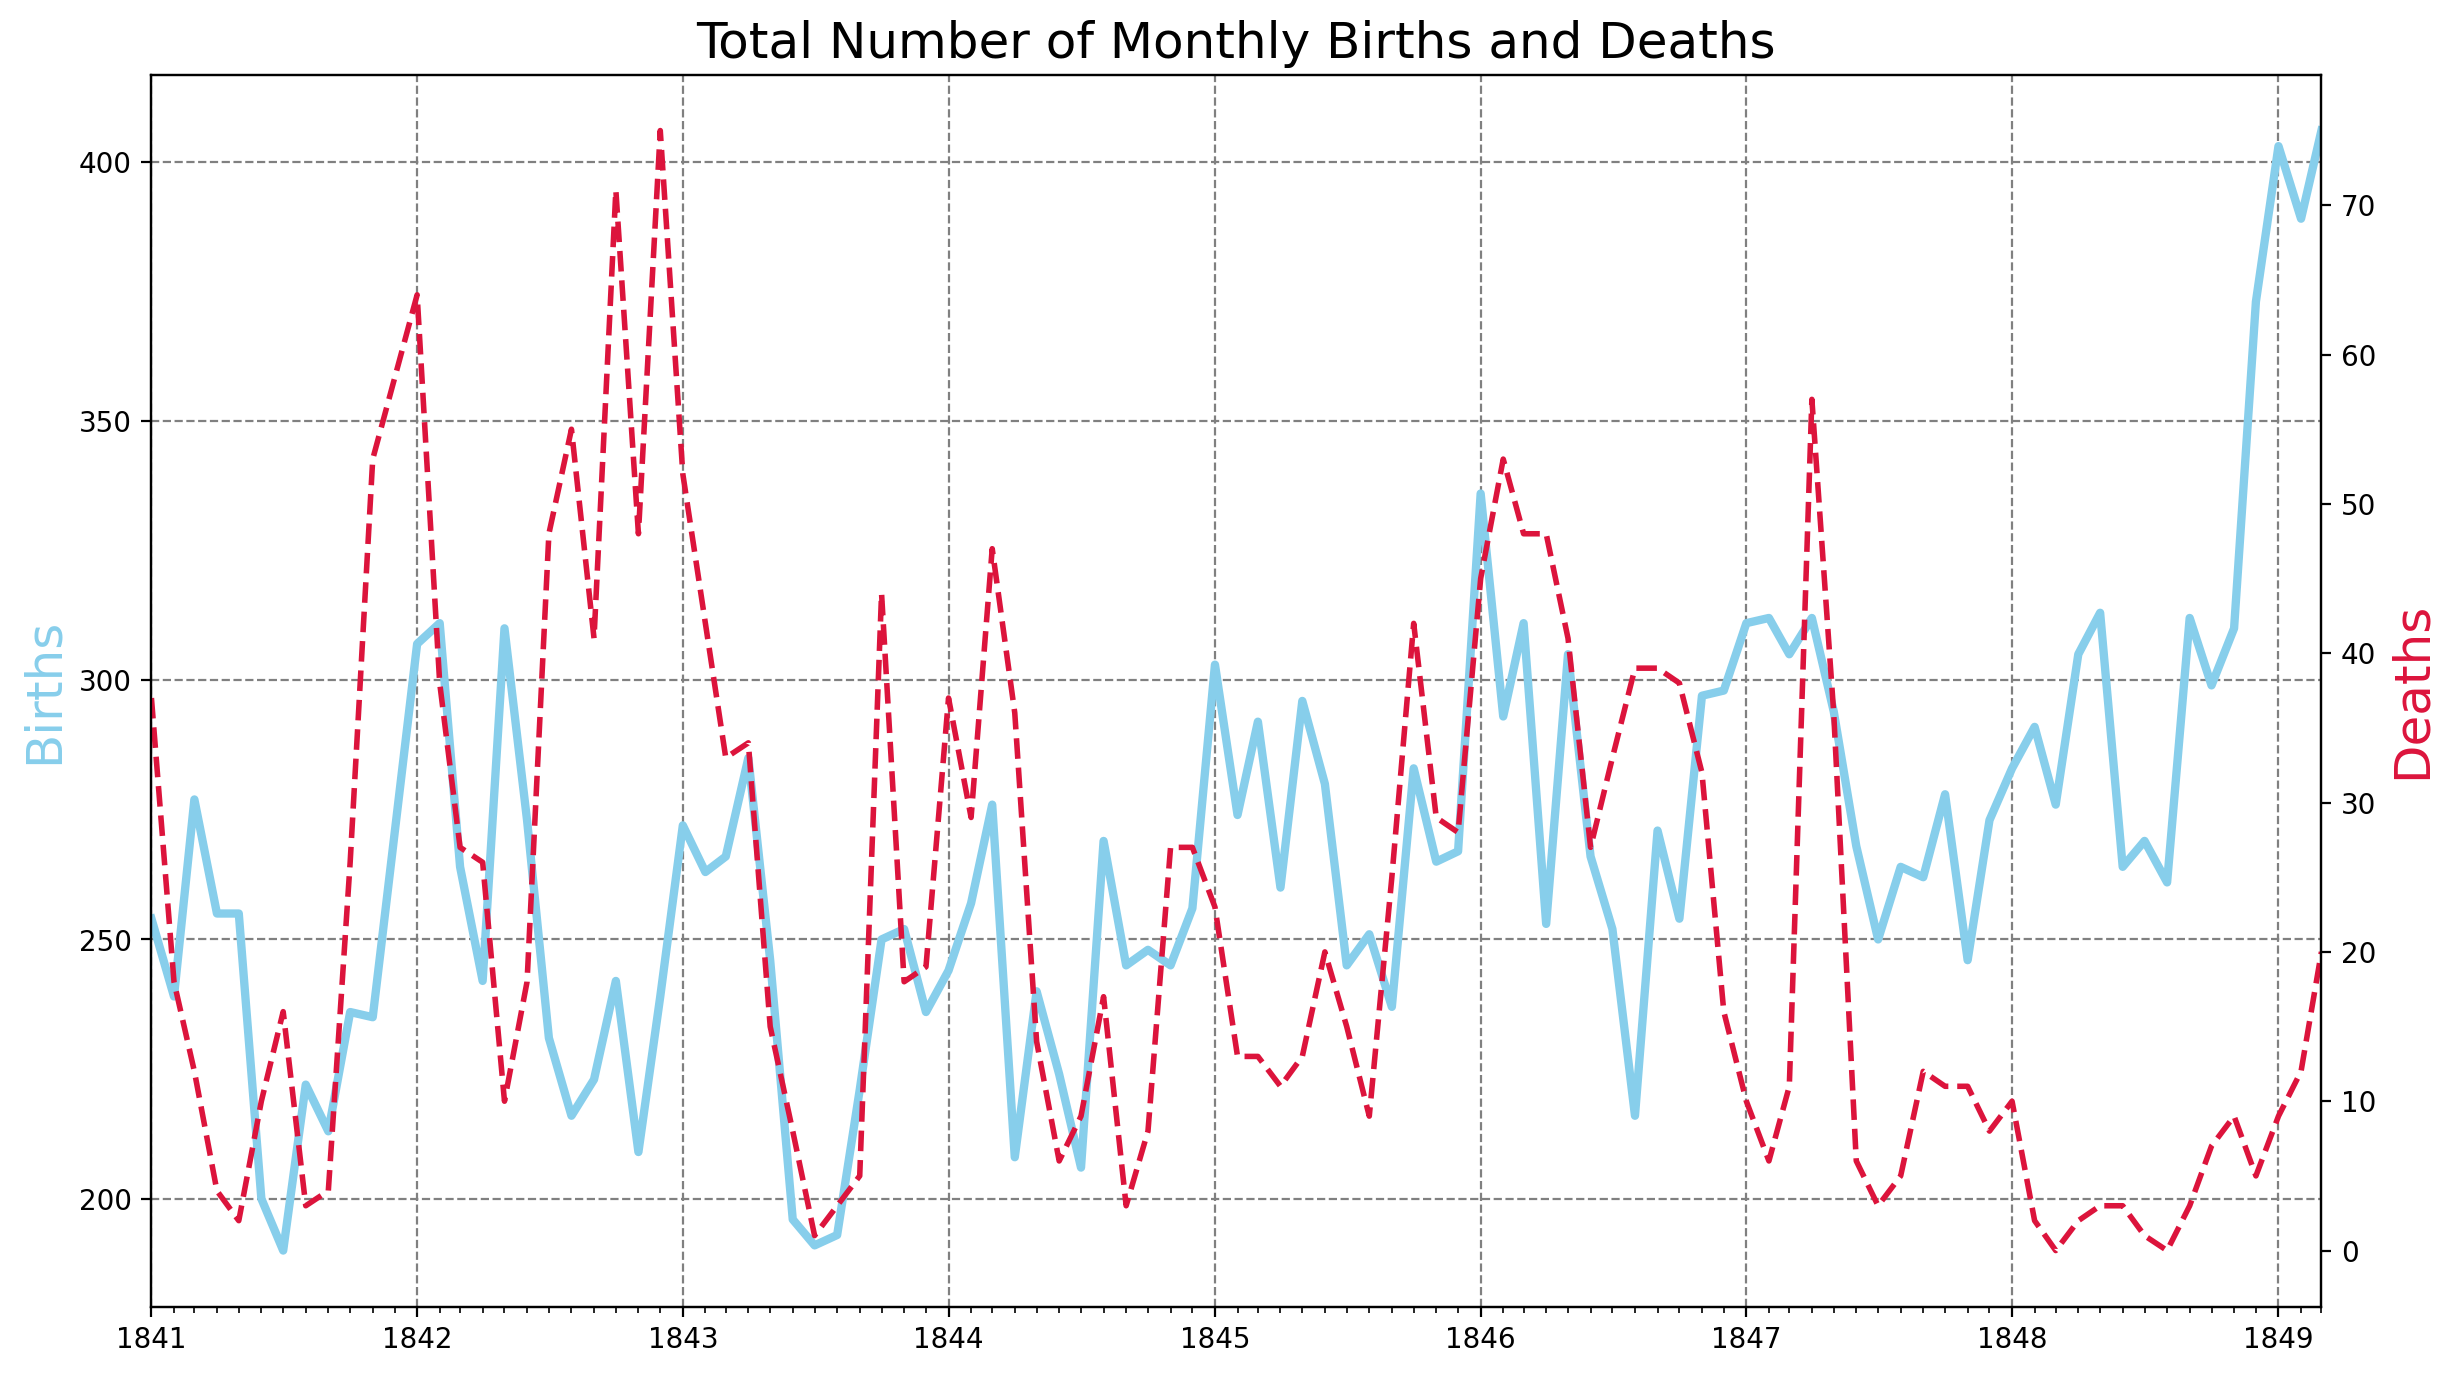

In [13]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 


plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color = 'grey' , linestyle = '--')

ax1.plot( df_monthly.date ,
         df_monthly.births,
         color = 'skyblue',
         linewidth = 3
        )

ax2.plot( df_monthly.date ,
          df_monthly.deaths,
         color = 'crimson',
         linewidth = 2,
         linestyle='--'
        )
plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [14]:
px.line(x=df_yearly.year,y= df_yearly.births,color=df_yearly.clinic)

In [15]:
px.line(x=df_yearly.year,y= df_yearly.deaths,color=df_yearly.clinic)

### the Proportion of Deaths at Each Clinic


* how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [16]:
df_yearly['pct_deaths']=df_yearly.deaths / df_yearly.births
df_yearly

year  births  deaths    clinic  pct_deaths
0   1841    3036     237  clinic 1        0.08
1   1842    3287     518  clinic 1        0.16
2   1843    3060     274  clinic 1        0.09
3   1844    3157     260  clinic 1        0.08
4   1845    3492     241  clinic 1        0.07
5   1846    4010     459  clinic 1        0.11
6   1841    2442      86  clinic 2        0.04
7   1842    2659     202  clinic 2        0.08
8   1843    2739     164  clinic 2        0.06
9   1844    2956      68  clinic 2        0.02
10  1845    3241      66  clinic 2        0.02
11  1846    3754     105  clinic 2        0.03

### Plotting the Proportion of Yearly Deaths by Clinic

In [17]:
df_clinic_pct = df_yearly.groupby(by='clinic',as_index=False).agg({'pct_deaths':pd.Series.mean})
df_clinic_pct

clinic  pct_deaths
0  clinic 1        0.10
1  clinic 2        0.04

In [18]:
px.line(x=df_yearly.year,
        y= df_yearly.pct_deaths,
        color=df_yearly.clinic,
               title='Proportion of Yearly Deaths by Clinic')

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [19]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [20]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [21]:
df_bfr_HW = df_monthly[df_monthly.date <'1847-06-01']
df_aftr_HW = df_monthly[df_monthly.date >='1847-06-01']

print(f'prcnt of death before handwasshing {round(df_bfr_HW.pct_deaths.mean()*100,2)} %')
print(f'prcnt of death After handwasshing {round(df_aftr_HW.pct_deaths.mean()*100,2)} %')

prcnt of death before handwasshing 10.5 %
prcnt of death After handwasshing 2.11 %


### Rolling Average of the Death Rate

DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.


In [22]:
roll_df = df_bfr_HW.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart



* the monthly death rate before handwashing as a thin dashed black line. 
* the moving average as a thicker, crimon line.
* the rate after handwashing as a skyblue line with round markers. 


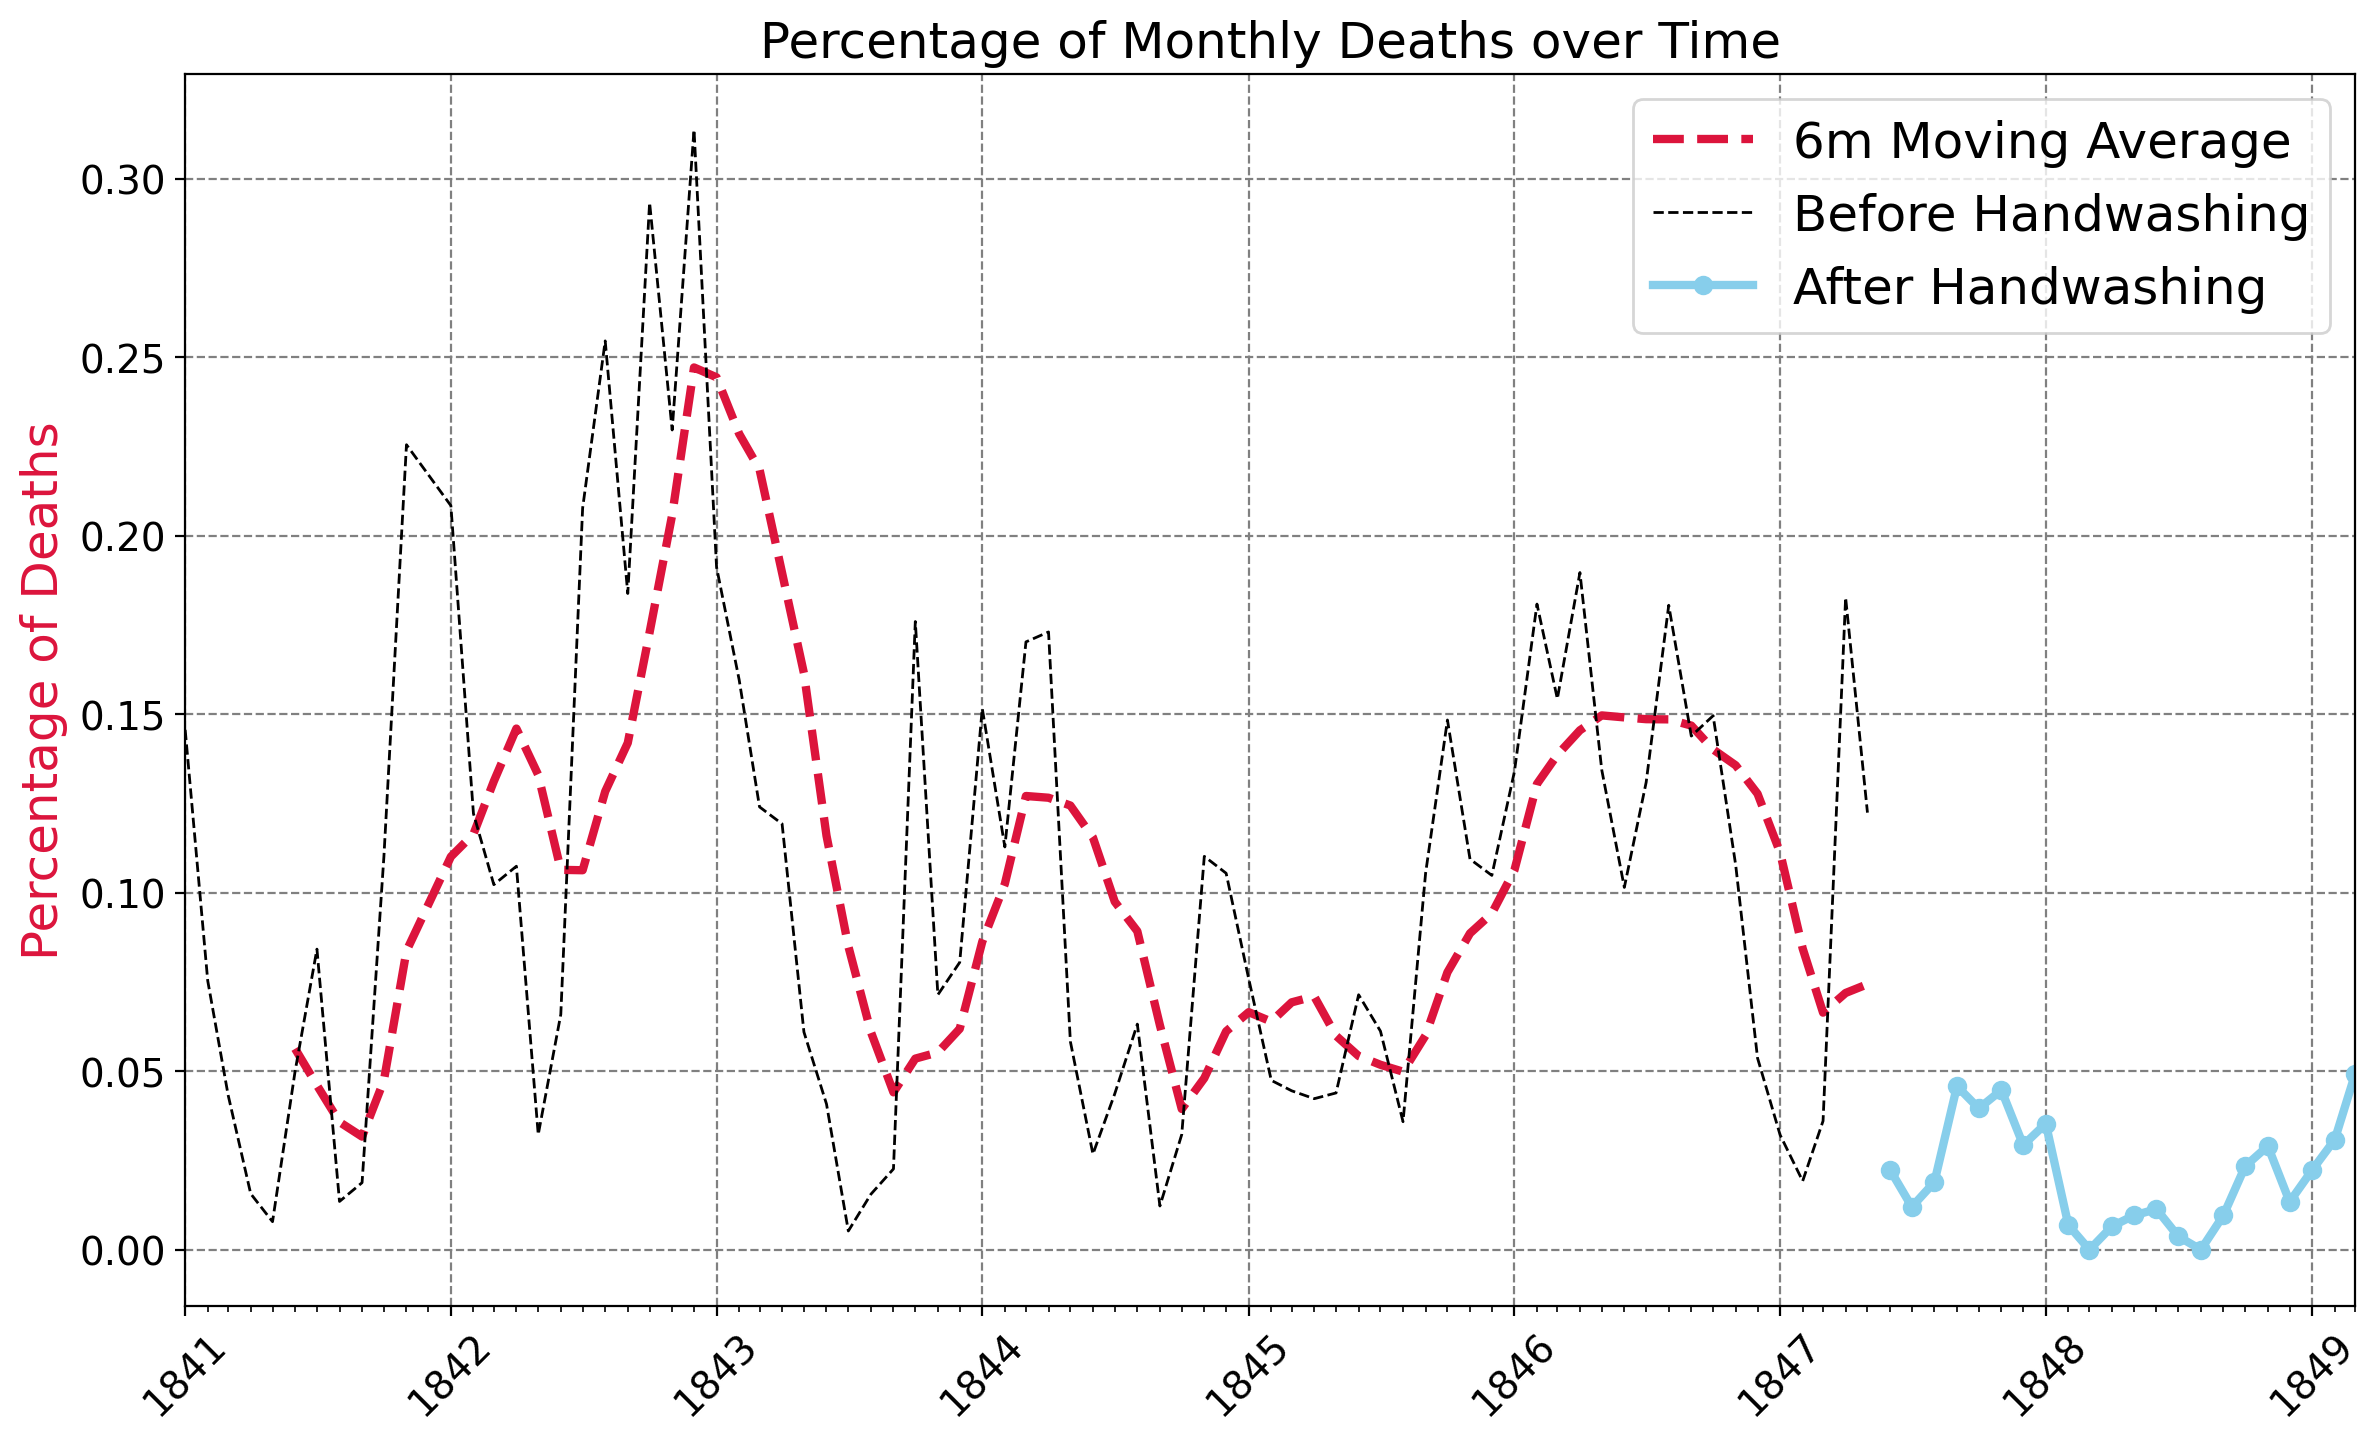

In [23]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_bfr_HW.date, 
                    df_bfr_HW.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(df_aftr_HW.date, 
                    df_aftr_HW.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

### the Difference in the Average Monthly Death Rate


* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [24]:
display(df_bfr_HW.pct_deaths.mean())
display(df_aftr_HW.pct_deaths.mean())

0.10504998260908793

0.021093375097254535

In [31]:
changing_rate=round(( df_aftr_HW.pct_deaths.mean()/df_bfr_HW.pct_deaths.mean())*100,2)
changing_rate

20.08

### Box Plots to Show How the Death Rate Changed Before and After Handwashing


In [26]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [27]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

### Histograms to Visualise the Monthly Distribution of Outcomes

the monthly percentage of deaths. 


In [28]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

### Kernel Density Estimate (KDE) to visualise a smooth distribution



In [29]:
df_monthly.head()

date  births  deaths  pct_deaths washing_hands
0 1841-01-01     254      37        0.15            No
1 1841-02-01     239      18        0.08            No
2 1841-03-01     277      12        0.04            No
3 1841-04-01     255       4        0.02            No
4 1841-05-01     255       2        0.01            No

<AxesSubplot:title={'center':'death with handwishing per time'}, xlabel='pct_deaths', ylabel='Density'>

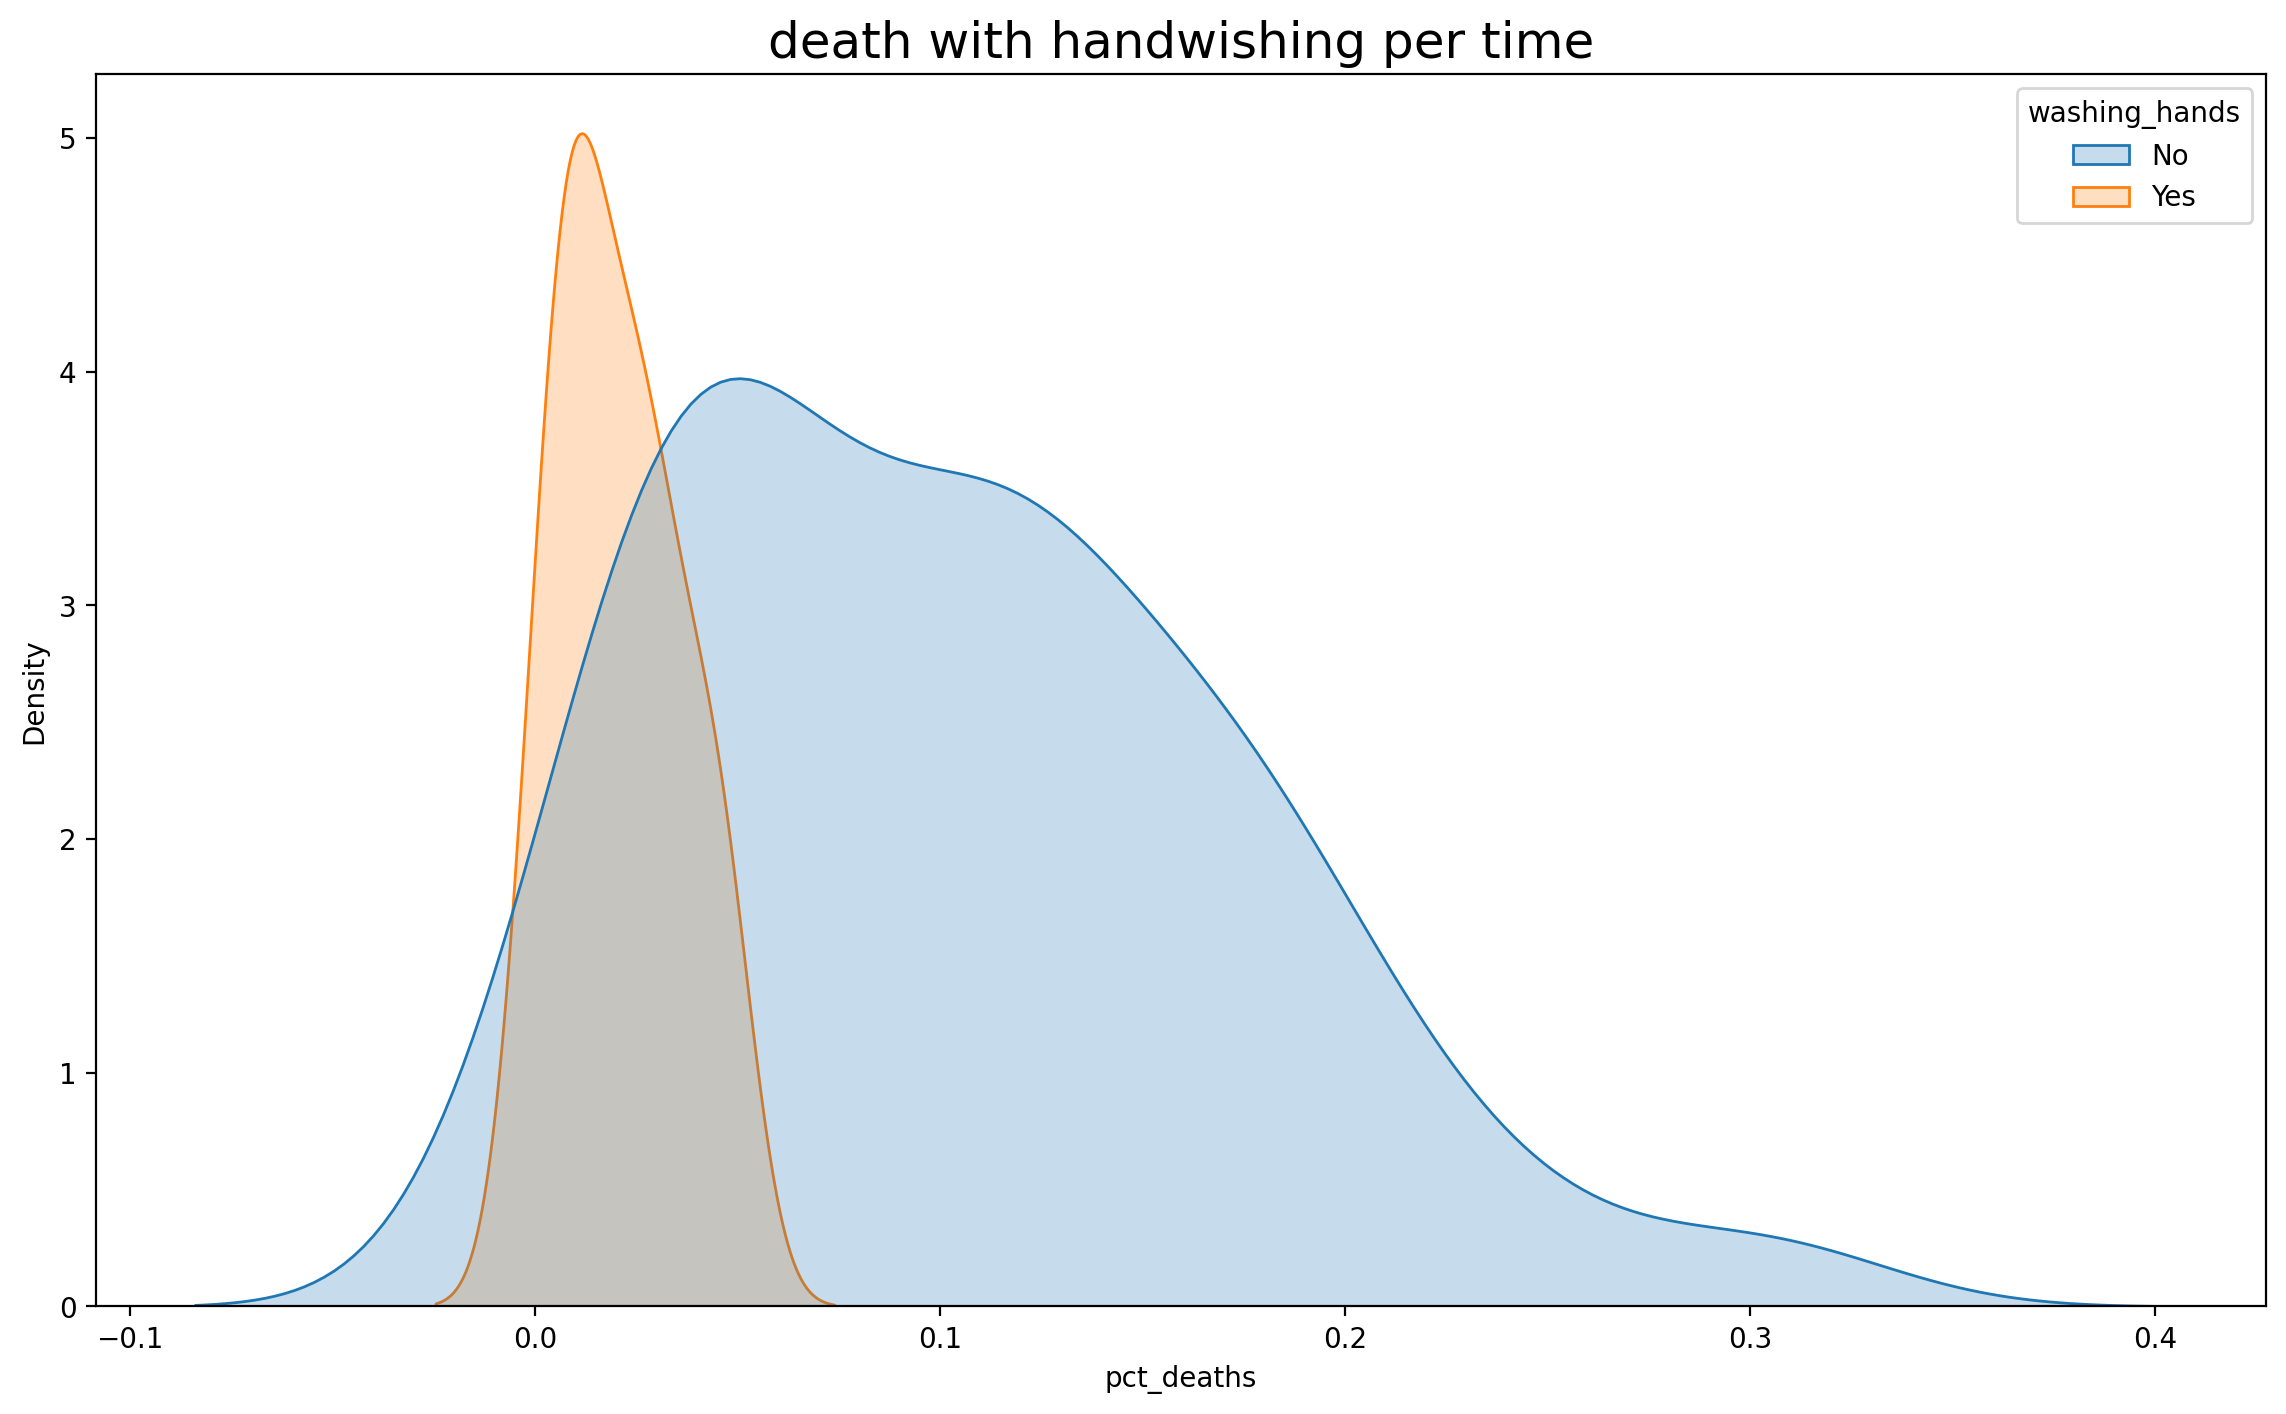

In [30]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('death with handwishing per time', fontsize=18)
sns.kdeplot(data=df_monthly, 
            x="pct_deaths",
            hue='washing_hands',
            shade='washing_hands')

### a T-Test to Show Statistical Significance

t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 


* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



What do you conclude from your analysis, Doctor?

<img src=https://i.imgur.com/rvjNVzQ.gif>